In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
model = CmdStanModel(stan_file='stan1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


# Variant A


In [3]:
resultA = model.sample(data={'N':1, 'y':[1]}, 
                            seed = 14091999,
                            chains = 4)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [4]:
print(resultA.diagnose())

Processing csv files: C:\Users\User\AppData\Local\Temp\tmpeg4btqgz\stan1-20220315120254_1.csv, C:\Users\User\AppData\Local\Temp\tmpeg4btqgz\stan1-20220315120254_2.csv, C:\Users\User\AppData\Local\Temp\tmpeg4btqgz\stan1-20220315120254_3.csv, C:\Users\User\AppData\Local\Temp\tmpeg4btqgz\stan1-20220315120254_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
321 of 4000 (8.03%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.



In [6]:
#Convertion to arviz InferenceData
arviz_resultA = az.from_cmdstanpy(
    posterior=resultA
)
#Calculating log sigma
postA = arviz_resultA.posterior
postA["log_sigma"] = np.log(postA["sigma"])
arviz_resultA

Inference data with groups:
	> posterior
	> sample_stats

<AxesSubplot:xlabel='mu', ylabel='log_sigma'>

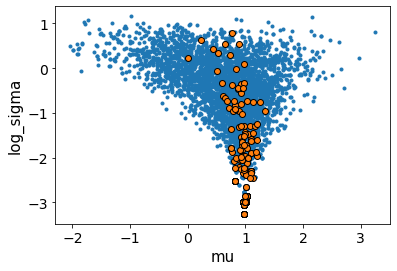

In [7]:
#Arviz plot
az.plot_pair(arviz_resultA, var_names=['mu', 'log_sigma'], divergences=True)

# Variant B


In [8]:
resultB = model.sample(data={'N':5, 'y':[1.05, 0.87, -0.49, -0.22, 0.18]}, 
                            seed = 14091999, #Date of birth
                            chains = 4)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [9]:
print(resultB.diagnose())

Processing csv files: C:\Users\User\AppData\Local\Temp\tmpeg4btqgz\stan1-20220315120405_1.csv, C:\Users\User\AppData\Local\Temp\tmpeg4btqgz\stan1-20220315120405_2.csv, C:\Users\User\AppData\Local\Temp\tmpeg4btqgz\stan1-20220315120405_3.csv, C:\Users\User\AppData\Local\Temp\tmpeg4btqgz\stan1-20220315120405_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



In [10]:
#Convertion to arviz InferenceData
arviz_resultB = az.from_cmdstanpy(
    posterior=resultB
)
#Calculating log sigma
postB = arviz_resultB.posterior
postB["log_sigma"] = np.log(postB["sigma"])
arviz_resultB

Inference data with groups:
	> posterior
	> sample_stats

<AxesSubplot:xlabel='mu', ylabel='log_sigma'>

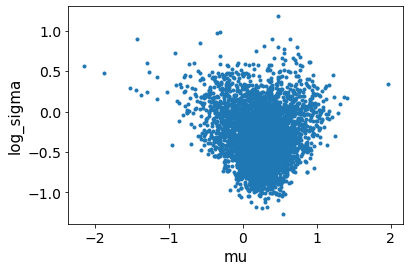

In [11]:
#Arviz plot
az.plot_pair(arviz_resultB, var_names=['mu', 'log_sigma'], divergences=True)